In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from camera import PhotoReceptor

# Grabbing one frame and exiting

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 4, dim1 : 576.0, dim2 : 1024.0


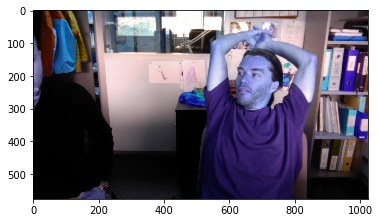

In [3]:
Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE=4)

#Ph.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640.)
#Ph.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)
#print(Ph.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), Ph.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#frame = Ph.grab()
frame = Ph.grab()
Ph.close()

plt.imshow(frame)

# Benchmarking camera for different sizes

In [4]:
downscales = 2.**np.arange(5)
downscales = np.arange(1, 20) # 
downscales = (4/3)**np.arange(5)
print(downscales)

In [ ]:
'''  Version a : Run the program and calculate the framerate (limit = number of frames recorded) '''

num_frames = 50
sizes_a, frames_a = [], []
for ds in downscales:
    
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    frame = Ph.grab()

    time.sleep(1)
    start = time.time()

    for i in range(num_frames):
        frame = Ph.grab()

    seconds = time.time() - start
        
    sizes_a.append(Ph.h*Ph.w)
    Ph.close()

    fps = num_frames / seconds
    frames_a.append(fps)
    print ('Frame rate %s : \n' % fps)

Before a downscale of 1, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1, dim1 : 720.0, dim2 : 1280.0
Frame rate 30.01645274755159 : 

Before a downscale of 2, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 2, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.921920434291547 : 

Before a downscale of 3, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 3, dim1 : 576.0, dim2 : 1024.0
Frame rate 30.12222387880052 : 

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 4, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.92279565096483 : 

Before a downscale of 5, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 5, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.910321179622066 : 

Before a downscale of 6, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 6, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.913700166346345 : 

Before a downscale of 7, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 7, dim1 : 576.0, dim2 : 1

In [ ]:
''' Version b : Run the program and calculate the framerate (limit = time recorded) '''

sizes_b, frames_b = [], []
for ds in downscales:
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    Rec = True
    nb_frames = 0

    start = time.time()

    while(Rec == True):

        frame = Ph.grab()
        nb_frames += 1
        
        seconds = time.time() - start
        
        if seconds >= 10 :
            Rec = False
    sizes_b.append(Ph.h*Ph.w)
           
    Ph.close()

    fps = nb_frames / seconds
    frames_b.append(fps)
    print ('Frame rate : %s \n' % fps)

Before a downscale of 1, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1, dim1 : 720.0, dim2 : 1280.0
Frame rate : 29.986314105727054 

Before a downscale of 2, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 2, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.019455065376942 

Before a downscale of 3, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 3, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.02025383373149 

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 4, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.04098813309046 

Before a downscale of 5, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 5, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.027352532729832 

Before a downscale of 6, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 6, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.052834656379442 

Before a downscale of 7, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 7, dim1 : 576.0, dim2 : 

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(sizes_a, frames_a, 'b', marker='o', label='method a')
ax.plot(sizes_b, frames_b, 'r', marker='o', label='method b')
ax.grid(linestyle='--')
plt.legend()
ax.set_title('Effect of downscale on framerate, per method used')
ax.set_xlabel('Downscale')
ax.set_ylabel('Framerate')
ax.set_ylim(0, 1.1*max(max(frames_a), max(frames_b)))
plt.show()